# -------------Experiment - 12-----------

# Consider the Mnist dataset preprocess and built simple Sequential neural network on it. Test and evaluete the model using different metrics.

## import the libraies 

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np    
from sklearn.model_selection import train_test_split

In [2]:
# Optional: to ignore warnings

import warnings
warnings.filterwarnings('ignore')

## Load the dataset 

In [3]:

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# Length 

len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

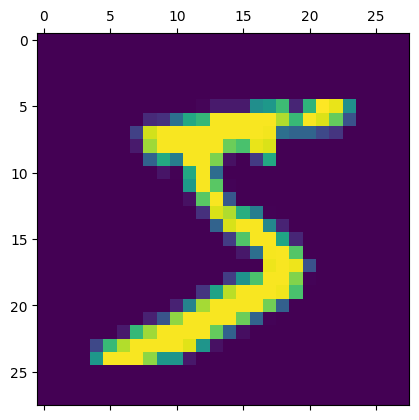

In [7]:
# plot the 

plt.matshow(X_train[0])
plt.show()

In [8]:
y_train[0]

np.uint8(5)

In [9]:
#

X_train = X_train / 255
X_test = X_test / 255

## Reshape it 

In [10]:

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
X_train_flattened.shape

(60000, 784)

## Fit the model 

In [12]:

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8752 - loss: 0.4703
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9143 - loss: 0.3043
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9203 - loss: 0.2840
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9234 - loss: 0.2738
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9257 - loss: 0.2667


## Predict the model

In [13]:

y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.6317380e-02, 5.7115386e-07, 6.1506644e-02, 9.6838218e-01,
       1.9624711e-03, 1.3742222e-01, 1.4103059e-06, 9.9978405e-01,
       8.8907547e-02, 5.9992301e-01], dtype=float32)

## Evaluate the model 

In [14]:

model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9253 - loss: 0.2701


[0.2701135277748108, 0.9253000020980835]

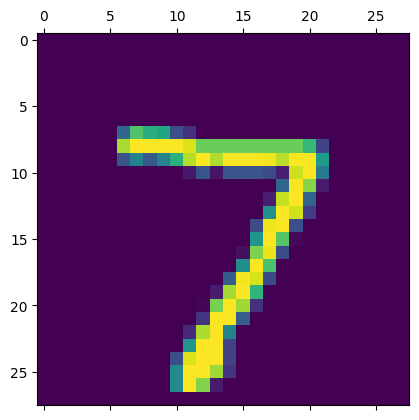

In [15]:
# Show the predict plot 

plt.matshow(X_test[0])

In [16]:
np.argmax(y_predicted[0])

np.int64(7)

In [17]:


y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [18]:

y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [21]:
# Show the confusion matrix

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    2,    0,    4,    3,    1,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   8,    9,  920,   21,    8,    4,   12,   10,   38,    2],
       [   3,    0,   16,  932,    0,   26,    2,    9,   17,    5],
       [   2,    2,    6,    2,  917,    0,   10,    3,    9,   31],
       [  10,    3,    2,   33,    8,  784,   14,    3,   29,    6],
       [  15,    3,    6,    2,    7,   13,  908,    2,    2,    0],
       [   1,   10,   22,   11,    9,    0,    0,  944,    4,   27],
       [   9,    8,    7,   32,    9,   27,    8,   11,  858,    5],
       [  11,    7,    1,   12,   28,    9,    0,   26,    6,  909]],
      dtype=int32)>

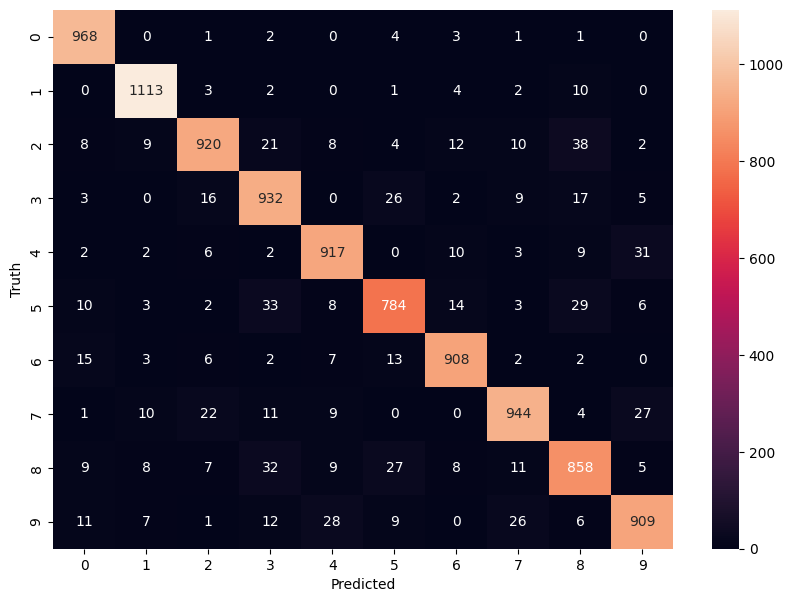

In [20]:
# Show the heat map 

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()